In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv('bank.csv')

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [6]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0
11161,34,9,1,1,0,0,0,0,0,9,5,628,1,-1,0,3,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [8]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
data.shape

(11162, 17)

In [10]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [11]:
data.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [12]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [13]:
x=data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]

In [14]:
y=data.deposit

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8929, 16)
(2233, 16)
(8929,)
(2233,)


In [17]:
data.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [18]:
dt=DecisionTreeClassifier()

In [19]:
from sklearn.metrics import classification_report, accuracy_score

In [20]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
 y_preds=dt.predict(x_test)

In [22]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1166
           1       0.76      0.75      0.75      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



In [23]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_preds=model.predict(x_test)
    print(classification_report(y_test,y_preds))
    print(model.score(x_test,y_test))
    print(model.score(x_train,y_train))
    return model

In [24]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1166
           1       0.76      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233

0.7622033139274519
1.0


DecisionTreeClassifier()

In [25]:
dt1=DecisionTreeClassifier(max_depth=10)

In [26]:
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1166
           1       0.79      0.81      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

0.8074339453649798
0.8904692574756412


DecisionTreeClassifier(max_depth=10)

In [27]:
dt2=DecisionTreeClassifier(min_samples_leaf=20)

In [28]:
mymodel(dt2)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1166
           1       0.79      0.81      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

0.8096730855351545
0.8579908164408109


DecisionTreeClassifier(min_samples_leaf=20)

In [29]:
dt3=DecisionTreeClassifier(criterion='gini',min_samples_leaf=20)

In [30]:
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1166
           1       0.79      0.81      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

0.8092252575011196
0.8579908164408109


DecisionTreeClassifier(min_samples_leaf=20)

In [31]:
dt4=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=20)

In [32]:
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1166
           1       0.79      0.80      0.79      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233

0.8007165248544559
0.858326800313585


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20)

In [33]:
for i in range (1,50):
    dT=DecisionTreeClassifier(max_depth=i)
    dT.fit(x_train,y_train)
    y_preds=dT.predict(x_test)
    print(f"{i}:{accuracy_score(y_test,y_preds)}")
          

1:0.6950291088222122
2:0.6950291088222122
3:0.7653381101656964
4:0.787281683833408
5:0.8051948051948052
6:0.8034034930586654
7:0.8101209135691895
8:0.8105687416032243
9:0.8047469771607703
10:0.8083296014330497
11:0.7975817286162113
12:0.7975817286162113
13:0.7931034482758621
14:0.7845947156291984
15:0.7832512315270936
16:0.7796686072548141
17:0.7760859829825347
18:0.7729511867442902
19:0.761307657859382
20:0.7644424540976265
21:0.7662337662337663
22:0.7666815942678011
23:0.7653381101656964
24:0.7626511419614868
25:0.7595163457232422
26:0.7666815942678011
27:0.7693685624720108
28:0.7630989699955217
29:0.7635467980295566
30:0.7684729064039408
31:0.7599641737572772
32:0.7648902821316614
33:0.7604120017913122
34:0.7639946260635916
35:0.768025078369906
36:0.7644424540976265
37:0.7693685624720108
38:0.7626511419614868
39:0.7693685624720108
40:0.7689207344379758
41:0.7563815494849978
42:0.7581728616211375
43:0.7599641737572772
44:0.7666815942678011
45:0.7595163457232422
46:0.7666815942678011


In [34]:
dT1=DecisionTreeClassifier(max_depth=2)
dT1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

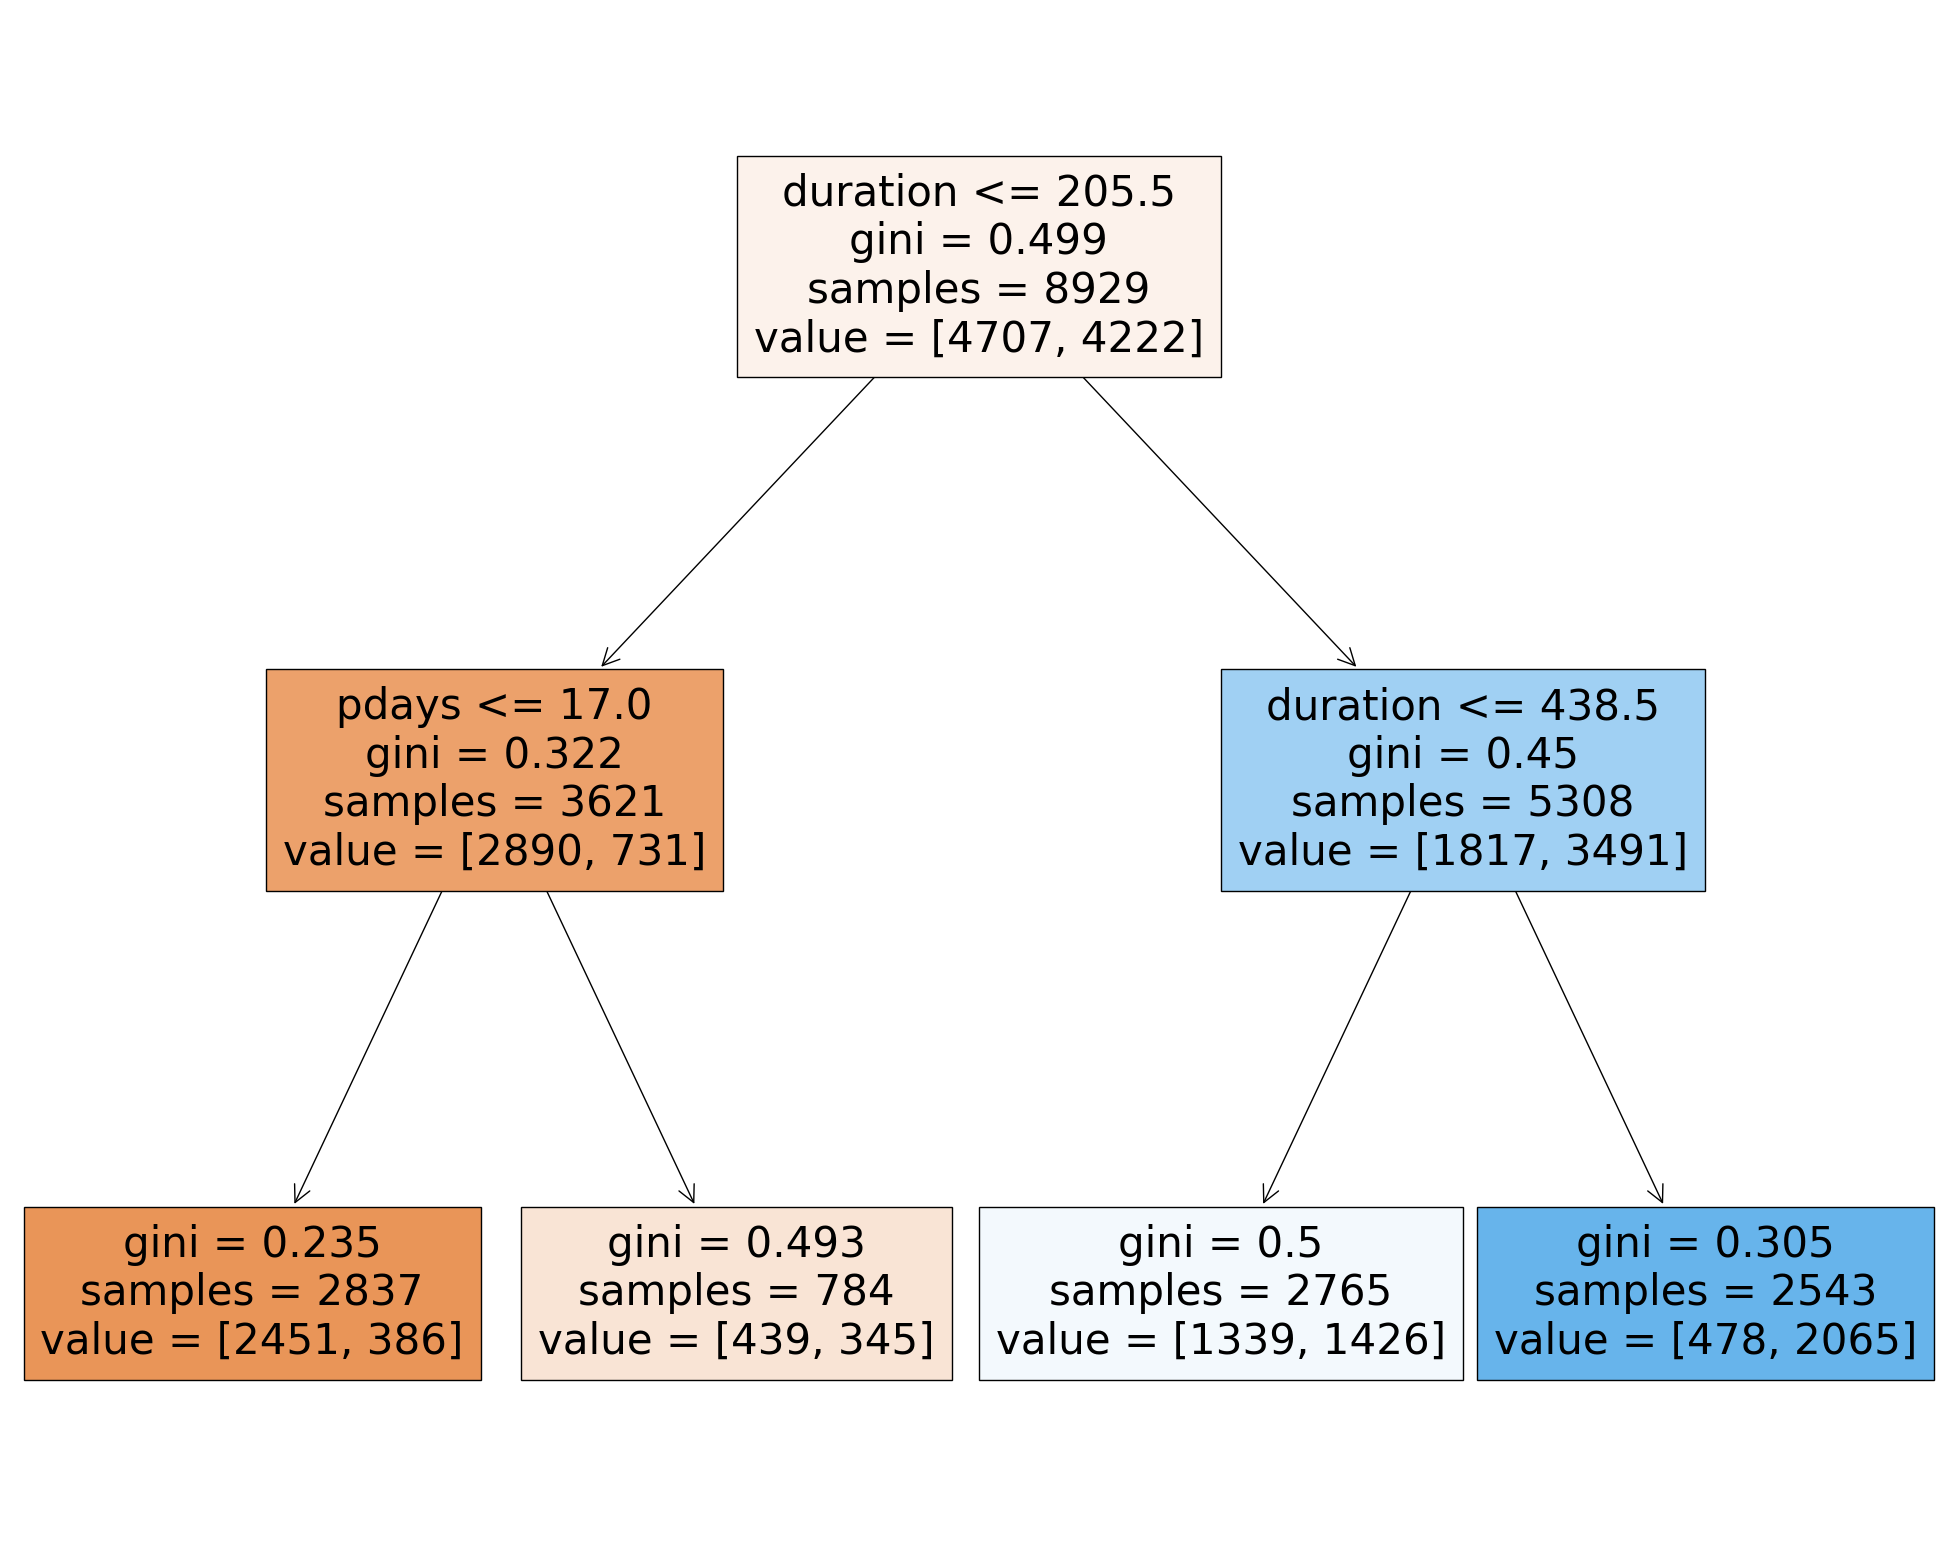

In [35]:
# from sklearn import tree
# fig=plt.figure(figsize=(25,20))
# t= tree.plot_tree(dT1,filled=True,feature_names=x.columns)
# plt.show()

from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
t = tree.plot_tree(dT1, filled=True, feature_names=x.columns)
plt.show()

In [36]:
dt.feature_importances_

array([0.07328027, 0.03285109, 0.01407151, 0.01928108, 0.00116008,
       0.07656366, 0.03784644, 0.0064077 , 0.06845711, 0.06538246,
       0.10237341, 0.35957672, 0.02576693, 0.07326712, 0.01095054,
       0.0327639 ])

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define your model
model = DecisionTreeClassifier()

# Define the parameter grid using your predefined dictionary
params = {'criterion': ['entropy', 'gini'],
          'max_depth': [10, 20, 30, 40],
          'min_samples_leaf': [20, 30, 40]}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt, param_grid=params )

# Fit the grid search to the data
grid_search.fit(x_train, y_train)  # Replace x_train and y_train with your actual training data

# Access the best parameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 30}


In [38]:
# from sklearn.metrics import accuracy_score
accuracy_score(y_preds,y_test)

0.761307657859382